In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

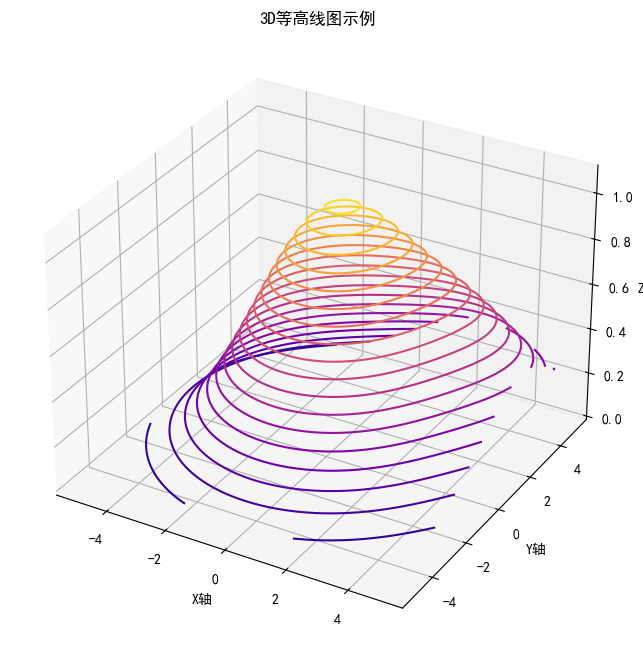

In [3]:
# 创建数据
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-0.1 * (X**2 + Y**2)) + 0.5 * np.exp(-0.1 * ((X-3)**2 + (Y-3)**2))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D等高线图
ax.contour(X, Y, Z,
           levels=20,     # 等高线数量，值越大线条越密集
           cmap='plasma'  # 颜色映射方案
          )

ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_zlabel('Z轴')
ax.set_title('3D等高线图示例')

plt.show()

# 2、使用示例：

### 示例 1：垂直延伸效果

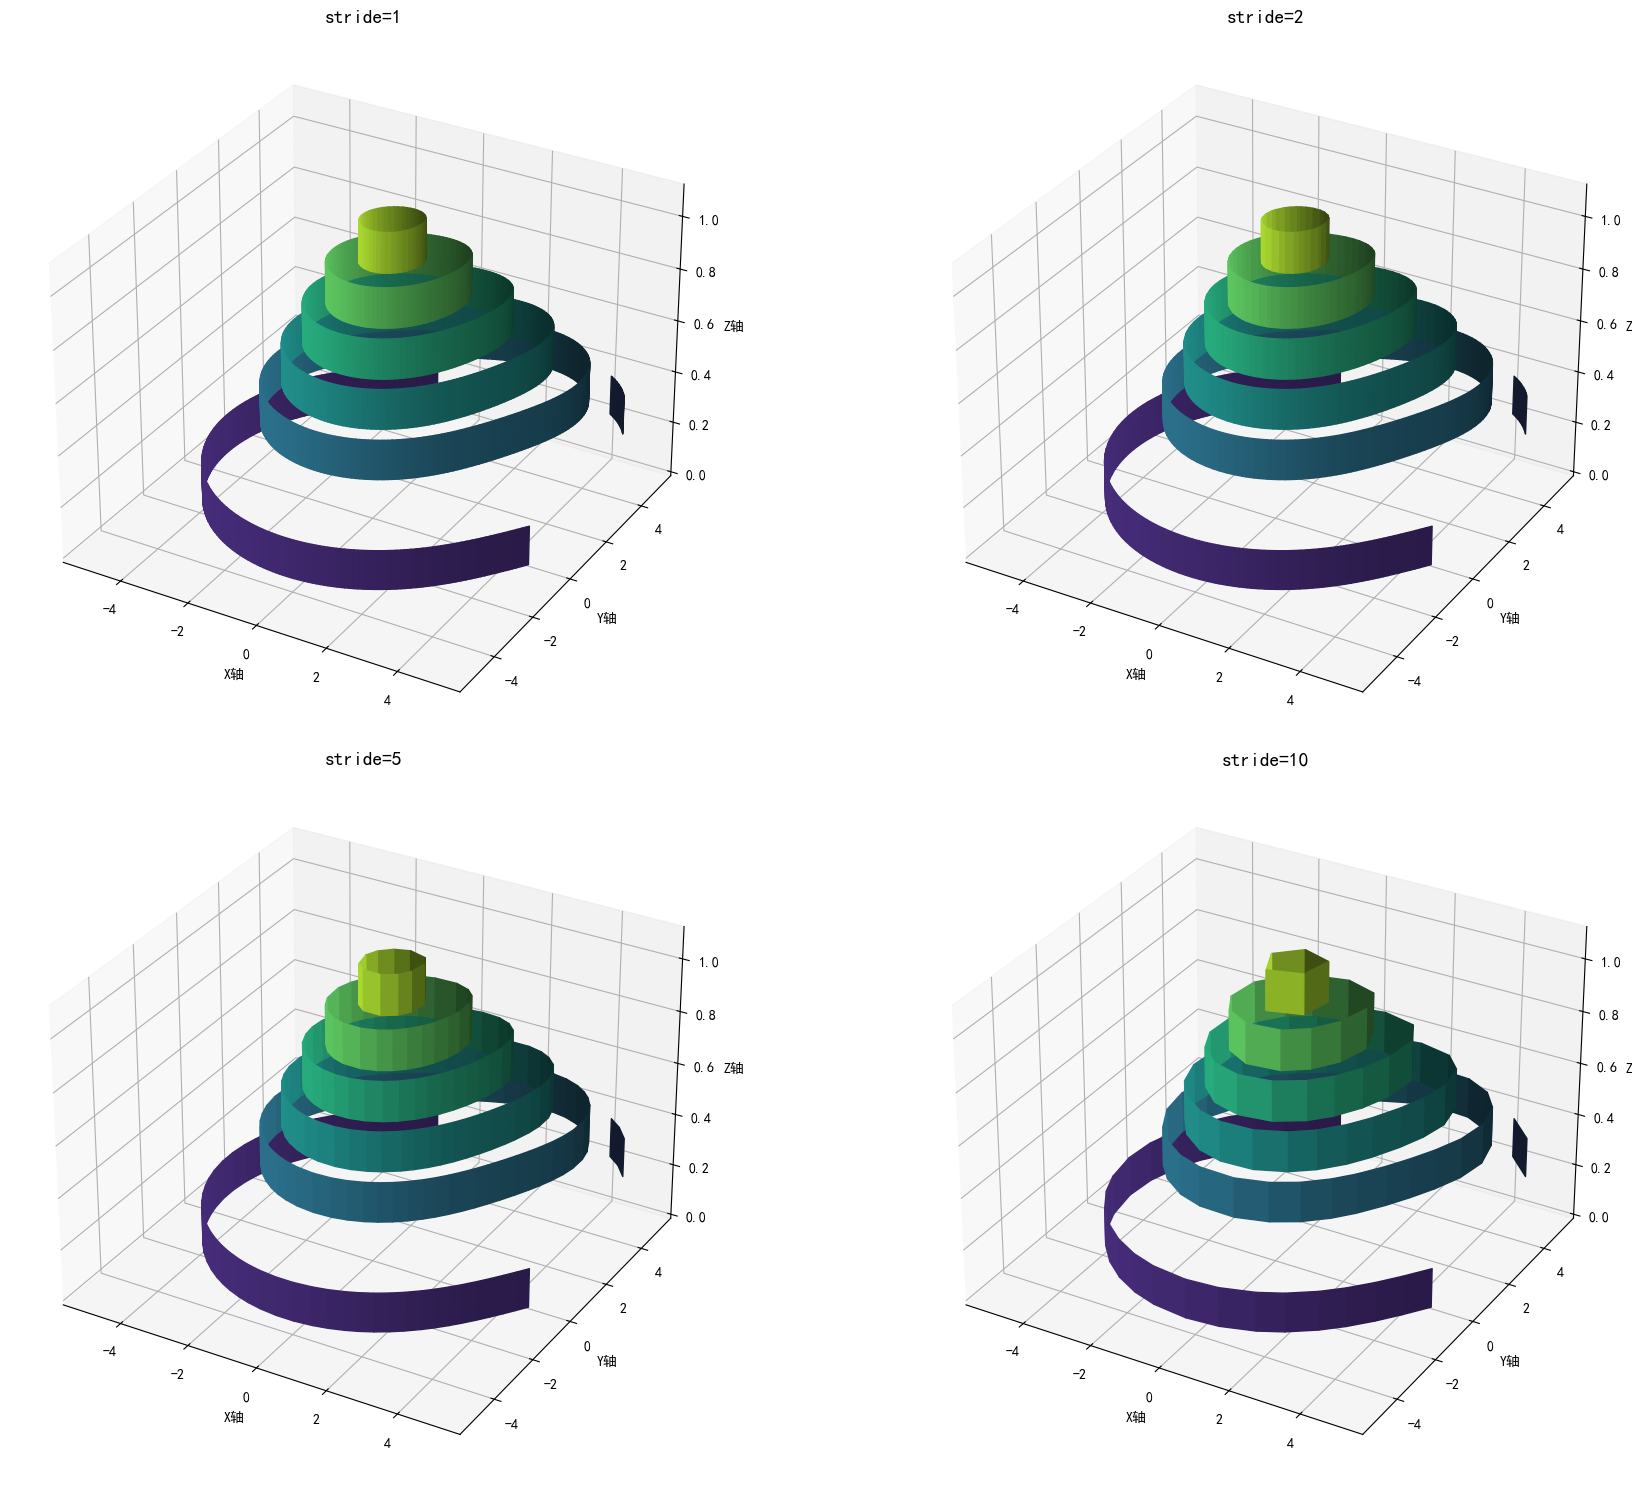

In [4]:
fig = plt.figure(figsize=(20, 15))

stride_values = [1, 2, 5, 10]
titles = ['stride=1', 'stride=2', 
          'stride=5', 'stride=10']

for i, (stride_val, title) in enumerate(zip(stride_values, titles)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    
    # 绘制3D延伸等高线，并应用当前循环的stride参数
    contour = ax.contour(
        X, Y, Z,                # 数据网格和Z值
        levels=8,               # 等高线数量
        cmap='viridis',         # 颜色映射
        extend3d=True,          # 开启3D延伸模式，等高线将向offset位置延伸
        offset=Z.min()-0.2,     # 延伸终点位置：比Z的最小值低0.2，确保完整显示
        stride=stride_val,      # 当前测试的步长值，控制延伸线条的密度
        linewidths=2            # 等高线线条宽度
    )
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('X轴')
    ax.set_ylabel('Y轴')
    ax.set_zlabel('Z轴')

plt.tight_layout()
plt.show()

### 示例 2：多方向投影

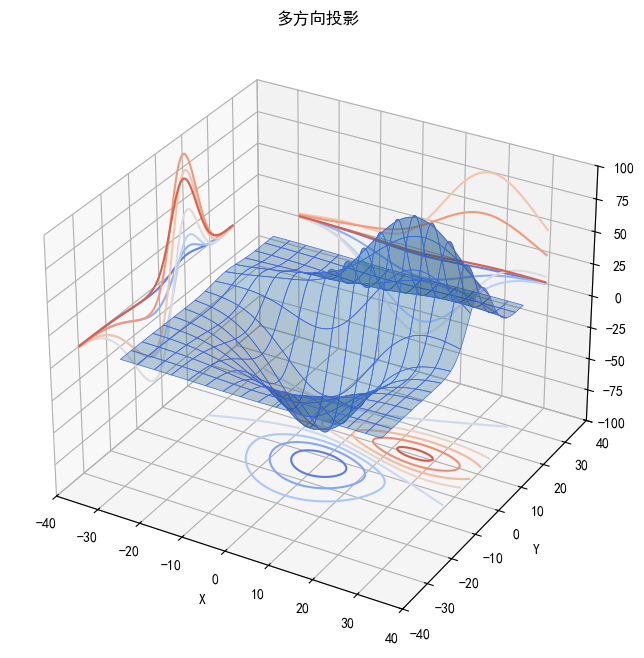

In [5]:
# 导入3D绘图工具包中的axes3d模块，用于生成测试数据和3D绘图
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# 生成测试数据：X, Y为网格坐标，Z为对应高度值
# 参数0.05控制数据密度，值越小网格越密集，图形越精细
X, Y, Z = axes3d.get_test_data(0.05)
# 绘制3D表面图，作为背景参考
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# 在Z轴方向添加等高线投影（沿Z轴切片）
# offset=-100表示等高线绘制在Z=-100的平面上
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
# 在X轴方向添加等高线投影（沿X轴切片）
# offset=-40表示等高线绘制在X=-40的平面上
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
# 在Y轴方向添加等高线投影（沿Y轴切片）
# offset=40表示等高线绘制在Y=40的平面上
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')
ax.set_title('多方向投影')
plt.show()

### 示例 3：结合曲面图使用

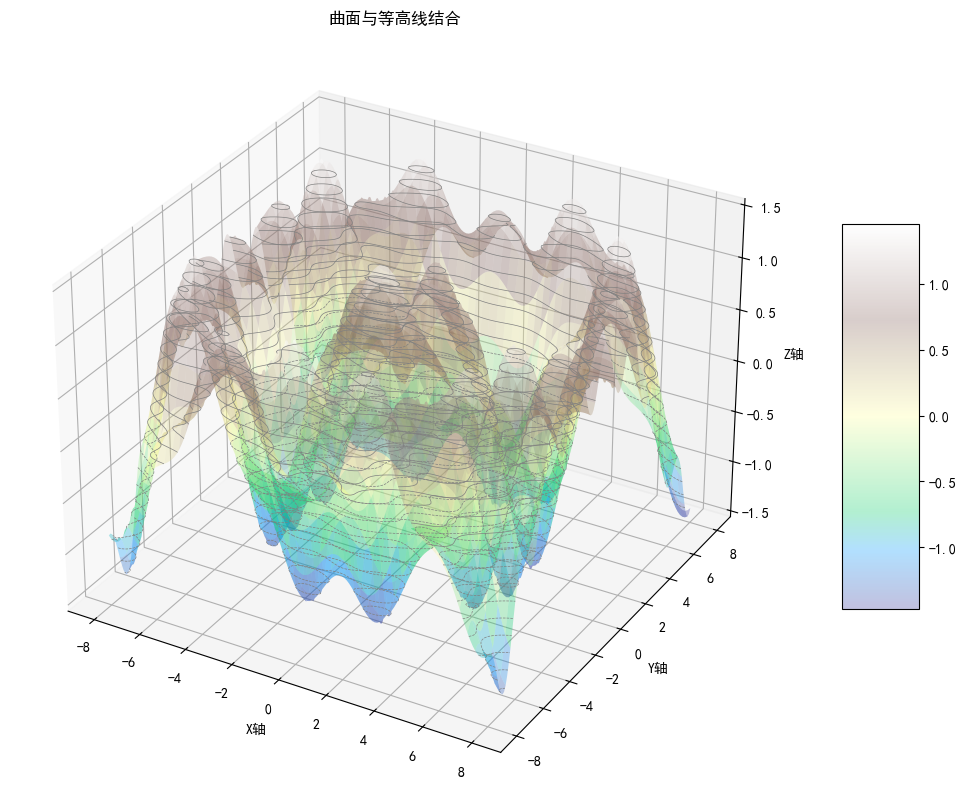

In [6]:
# 创建数据
x = np.linspace(-8, 8, 150)
y = np.linspace(-8, 8, 150)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) + 0.2 * np.cos(2*X) + 0.3 * np.sin(3*Y)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
surf = ax.plot_surface(X, Y, Z, cmap='terrain', alpha=0.3)

# 叠加等高线
contour = ax.contour(X, Y, Z, levels=20 , colors='gray', linewidths=0.5)

ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_zlabel('Z轴')
ax.set_title('曲面与等高线结合')

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()